# Raw image selection

I order to get a good result on the optical flow algorithm, there is a need for images at every hour, as well as 45 minutes past every hour. It takes, nevertheless, a lot of time to obtain the images at 45 minutes past, since they aren't already been fetched. Only up to 500 images can be downloaded every day, which means that getting hourly images for every hour in a year will at least take 18 days. This time can be reduced, since the satellite images are black at night.

Below is a list of some checked dates, and the interval of which the satellite images are not black. The goal of this notebook is to find a function that can take in any day of the year, and return an interval which is sure to contain all the non-black images that were taken that day.

- 01 Jan: 10:00-14:00
- 15 Jan: 09:00-15:00
- 01 Feb: 08:00-16:00
- 15 Feb: 07:00-16:00
- 01 Mar: 06:00-17:00
- 15 Mar: 05:00-18:00
- 01 Apr: 05:00-18:00
- 15 Apr: 04:00-19:00
- 01 May: 03:00-20:00
- 15 May: 03:00-20:00
- 01 Jun: 02:00-21:00
- 15 Jun: 02:00-21:00
- 21 Jun: 02:00-21:00
- 01 Jul: 02:00-21:00
- 15 Jul: 02:00-21:00
- 01 Aug: 03:00-20:00
- 15 Aug: 03:00-19:00
- 01 Sep: 04:00-19:00
- 15 Sep: 05:00-18:00
- 01 Oct: 06:00-17:00
- 15 Oct: 06:00-16:00
- 01 Nov: 07:00-15:00
- 15 Nov: 08:00-15:00
- 01 Des: 09:00-14:00
- 15 Des: 10:00-14:00
- 21 Des: 10:00-14:00

In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
#days manually checked
dmc = [
    datetime(2019, 1, 1), datetime(2019, 1, 15),
    datetime(2019, 2, 1), datetime(2019, 2, 15),
    datetime(2019, 3, 1), datetime(2019, 3, 15),
    datetime(2019, 4, 1), datetime(2019, 4, 15),
    datetime(2019, 5, 1), datetime(2019, 5, 15),
    datetime(2019, 6, 1), datetime(2019, 6, 15), datetime(2019, 6, 21),
    datetime(2019, 7, 1), datetime(2019, 7, 15),
    datetime(2019, 8, 1), datetime(2019, 8, 15),
    datetime(2019, 9, 1), datetime(2019, 9, 15),
    datetime(2019, 10, 1), datetime(2019, 10, 15),
    datetime(2019, 11, 1), datetime(2019, 11, 15),
    datetime(2019, 12, 1), datetime(2019, 12, 15), datetime(2019, 12, 21)
]

# hour of first image of the dat at dmc dates
hfi = np.array([ 
    10, 9, 8, 7, 6, 5, 5, 4, 3, 3, 2, 2, 2, 
    2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10
]).reshape(-1,1)

# hour of last image of the dat at dmc dates
hli = np.array([ 
    14, 15, 16, 16, 17, 18, 18, 19, 20, 20, 21, 21, 21, 
    21, 21, 20, 19, 19, 18, 17, 16, 15, 15, 14, 14, 14
]).reshape(-1,1)

# ignoring leap year effects
def getDayOfTheYearList(dmc: [datetime]):
    dty = []
    for date in dmc:
        dty.append(date.timetuple().tm_yday)
    
    return np.array(dty).reshape(-1, 1)

dty = getDayOfTheYearList(dmc)

daysoftheyear = np.arange(1, datetime(2019, 12, 31).timetuple().tm_yday+1)

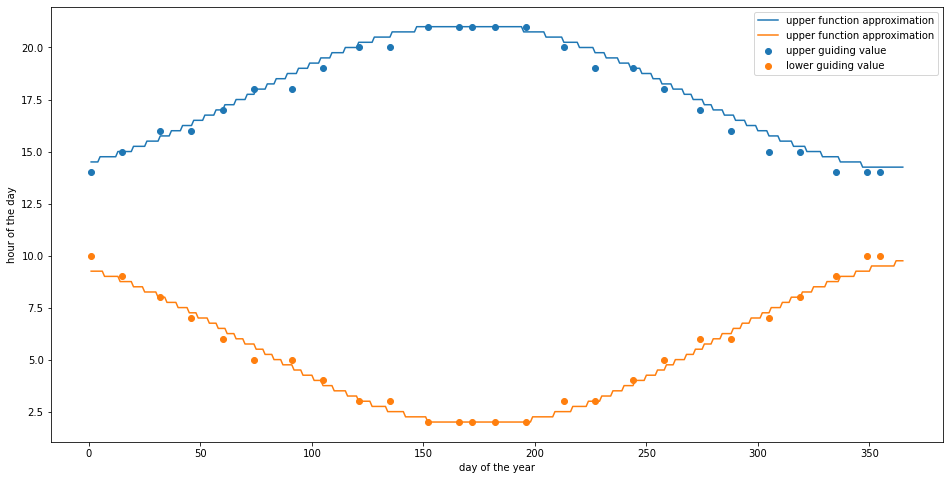

In [3]:
appr_upper = np.ceil(
    4*(np.ones(len(daysoftheyear))*17.5 + 3.5*np.sin(2*np.pi*(daysoftheyear-70)/(1.1*len(daysoftheyear)))))/4

appr_lower = np.floor(
    4*(np.ones(len(daysoftheyear))*6 + 4*np.cos(2*np.pi*(daysoftheyear+35)/(1.15*len(daysoftheyear)))))/4

plt.figure(figsize=(16,8))
plt.scatter(dty, hli, label='upper guiding value')
plt.scatter(dty, hfi, label='lower guiding value')
plt.plot(daysoftheyear, appr_upper, label='upper function approximation')
plt.plot(daysoftheyear, appr_lower, label='upper function approximation')
plt.ylabel('hour of the day')
plt.xlabel('day of the year')
plt.legend()
plt.show()

In [4]:
def date2start(date: datetime):
    '''
    Takes a given date and outputs the time interval of wanted images.
    The interval is closed, so when the return value is in the example, 
    include getting the images that were taken at 02:15 and 21:00.

    Some days of the year were manually chosen and the wanted interval was saved.
    These values were interpolated using trigonometric functions.
    The 'magic' numbers in this function come from tuning the interpolation,
    and the floor and ceil functions come from wanting to round to a 15th minute.

    Example:
    Input:
        date = datetime(2020, 5, 29)
    Output:
        [datetime(2020, 5, 29, 2, 15), datetime(2020, 5, 29, 21, 0)]
    '''
    dayofyear = date.timetuple().tm_yday

    upper = np.ceil(4*(17.5 + 3.5*np.sin(2*np.pi*(dayofyear-70)/(1.1*365))))/4
    lower = np.floor(4*(6 + 4*np.cos(2*np.pi*(dayofyear+35)/(1.15*365))))/4
    
    start = date + timedelta(hours=int(np.floor(lower)), minutes=int(60*(lower-np.floor(lower))))
    end = date + timedelta(hours=int(np.floor(upper)), minutes=int(60*(upper-np.floor(upper))))
    
    return [start, end]

print(date2start(datetime(2019, 5, 29)))

[datetime.datetime(2019, 5, 29, 2, 15), datetime.datetime(2019, 5, 29, 21, 0)]
